# News Mood

## Analysis

<ul>
<li>It is noticeable that significant part of all tweets has a neutral sentiment score, i.e. compound score=0 .</li>
<li>During the period of data analysis, neither completely positive tweets (compound score=1), nor completely negative tweets (compound score=-1) were observed.</li>
<li>Based on analysis of average compound scores (file "Sentiment.txt" contains screenshots of bar charts), we may notice that FOX and New York times have more positive tweets, than  BBC, CBS and CNN.</li>
</ul>

In [1]:
import tweepy
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# create a tuple of twitters of the following news organizations: BBC, CBS, CNN, Fox, and New York times.
target_news=("@BBCWorld", "@CBCNews", "@CNN", "@FoxNews", "@nytimes")

In [3]:
#create an empty DataFrame to store  tweets data
tweets_data=pd.DataFrame(columns=["News Source","Tweet Text","Tweet Date","Compound Score","Pos.score","Neg.score",
                                   "Neu.score","Tweets ago"])
index=0

# Loop through each news organization:
for target in target_news: 
    counter = 1   
    public_tweets = api.user_timeline(target, count=100, result_type="recent")    
    for tweet in public_tweets:           
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])        
        #Add sentiments and tweet data einto a DataFrame
        tweets_data.loc[index,"News Source"]=tweet["user"]["name"]
        tweets_data.loc[index,"Tweet Text"]=tweet["text"]
        tweets_data.loc[index,"Tweet Date"]=tweet["created_at"]
        tweets_data.loc[index,"Compound Score"]=results["compound"]
        tweets_data.loc[index,"Pos.score"]=results["pos"]
        tweets_data.loc[index,"Neg.score"]=results["neg"]
        tweets_data.loc[index,"Neu.score"]=results["neu"]
        tweets_data.loc[index,"Tweets ago"]=counter
        counter += 1
        index+=1
       

In [4]:
tweets_data.head(10)

,News Source,Tweet Text,Tweet Date,Compound Score,Pos.score,Neg.score,Neu.score,Tweets ago
0,BBC News (World),Trump calls for deportations without judicial ...,Sun Jun 24 19:17:37 +0000 2018,0,0,0,1,1
1,BBC News (World),Europe migrants: Italy warns Schengen is 'at r...,Sun Jun 24 18:55:57 +0000 2018,-0.3612,0,0.333,0.667,2
2,BBC News (World),Mali Fula villagers were killed 'in cold blood...,Sun Jun 24 17:44:07 +0000 2018,-0.6705,0,0.36,0.64,3
3,BBC News (World),Event in Dublin for 60 years of UN peacekeepin...,Sun Jun 24 17:02:54 +0000 2018,0.4588,0.231,0,0.769,4
4,BBC News (World),A juvenile male has been arrested over Tallagh...,Sun Jun 24 16:48:00 +0000 2018,-0.7906,0,0.467,0.533,5
5,BBC News (World),RT @bbctennis: He’s done it!\n\nCilic defeats ...,Sun Jun 24 16:43:57 +0000 2018,-0.3802,0,0.126,0.874,6
6,BBC News (World),Erdogan leads after early results in Turkey ht...,Sun Jun 24 15:54:59 +0000 2018,0,0,0,1,7
7,BBC News (World),Lava from Hawaii's Kilauea volcano creeps clos...,Sun Jun 24 15:22:40 +0000 2018,0,0,0,1,8
8,BBC News (World),RT @BBCSport: FT #ENG 6-1 #PAN \n\nKane ⚽⚽⚽\nS...,Sun Jun 24 13:53:17 +0000 2018,0.4574,0.166,0,0.834,9
9,BBC News (World),RT @BBCSport: GOAL! #ENG 6-1 #PAN \n\nComeback...,Sun Jun 24 13:38:10 +0000 2018,0,0,0,1,10


In [5]:
tweets_data.count()

News Source       500
Tweet Text        500
Tweet Date        500
Compound Score    500
Pos.score         500
Neg.score         500
Neu.score         500
Tweets ago        500
dtype: int64

In [6]:
print("Tweets data is stored in 'tweets_data.csv'")
tweets_data.to_csv("tweets_data.csv")

Tweets data is stored in 'tweets_data.csv'


In [7]:
bbc=tweets_data.loc[tweets_data["News Source"]=="BBC News (World)"]
cbc=tweets_data.loc[tweets_data["News Source"]=="CBC News"]
cnn=tweets_data.loc[tweets_data["News Source"]=="CNN"]
fox=tweets_data.loc[tweets_data["News Source"]=="Fox News"]
ny_times=tweets_data.loc[tweets_data["News Source"]=="The New York Times"]

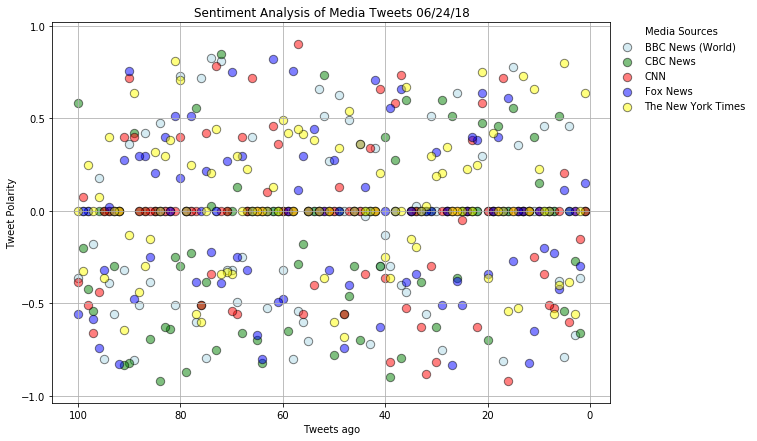

In [8]:
#create scatter plot for each news source
plt.figure(figsize=(10, 7))
plt.scatter(bbc["Tweets ago"], bbc["Compound Score"], color="lightblue", edgecolor="black",
             label="BBC News (World)", alpha=0.5, s=70, linewidths=1)    
plt.scatter(cbc["Tweets ago"], cbc["Compound Score"], color="green", edgecolor="black",
             label="CBC News", alpha=0.5,s=70, linewidths=1) 
plt.scatter(cnn["Tweets ago"], cnn["Compound Score"], color="red", edgecolor="black",
             label="CNN", alpha=0.5, s=70, linewidths=1) 
plt.scatter(fox["Tweets ago"], fox["Compound Score"], color="blue", edgecolor="black",
             label="Fox News", alpha=0.5, s=70, linewidths=1)
plt.scatter(ny_times["Tweets ago"], ny_times["Compound Score"], color="yellow", edgecolor="black",
             label="The New York Times", alpha=0.5, s=70, linewidths=1)

plt.grid()
#manually specify the bounding box into which the legend should be placed, using the bbox_to_anchor argument
plt.legend(bbox_to_anchor=(1.25,1), borderaxespad=0, title="Media Sources",frameon=False)

plt.yticks(np.arange(-1, 1.1, step=0.5))

#display data in the reverse order (100->0)
plt.xlim([bbc["Tweets ago"].max()+5,bbc["Tweets ago"].min()-5])
plt.title(f"Sentiment Analysis of Media Tweets {time.strftime('%x')}")
plt.savefig("compound_scatter.png", bbox_inches='tight', dpi=100)
plt.xlabel("Tweets ago")
plt.ylabel("Tweet Polarity")

plt.show()

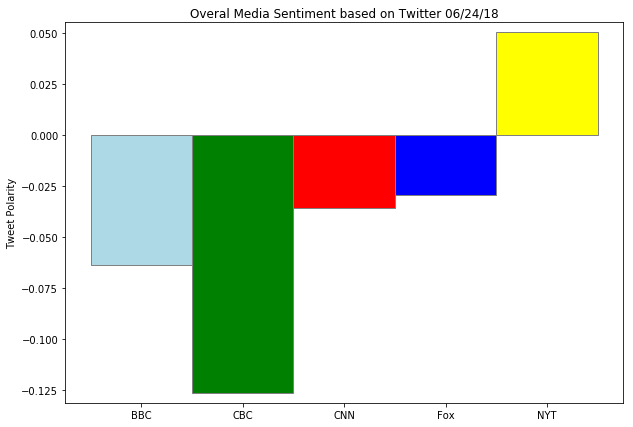

In [9]:
#aggregate the compound sentiments for each News Source
bbc_avg=bbc["Compound Score"].mean()
cbc_avg=cbc["Compound Score"].mean()
cnn_avg=cnn["Compound Score"].mean()
fox_avg=fox["Compound Score"].mean()
ny_times_avg=ny_times["Compound Score"].mean()
news_list=[bbc_avg, cbc_avg, cnn_avg, fox_avg, ny_times_avg]

#built a bar chart for average compound sentiments
news_names=["BBC", "CBC", "CNN", "Fox", "NYT"]
colors=["lightblue", "green","red", "blue", "yellow"]
x_axis=np.arange(len(news_list))
plt.figure(figsize=(10, 7))
plt.bar(x_axis, news_list, tick_label=news_names, color=colors, edgecolor="grey",width=1.0)
plt.ylabel("Tweet Polarity")
plt.ylim(min(news_list)-0.005,max(news_list)+0.005,)
plt.title(f"Overal Media Sentiment based on Twitter {time.strftime('%x')}")
plt.savefig("compound_bar.png")
plt.show()